<a href="https://colab.research.google.com/github/ybenabed/supervied_learning_MLDS2021/blob/main/papers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

In [1]:
%%capture
! gdown https://drive.google.com/uc?id=1P4P90pb2JhMF1VjAqLmI9M2OyUzXzn2f
! gdown https://drive.google.com/uc?id=1Xr26j1CcYHCxwQpNytDt7z6YbW4Qvx3q
! gdown https://drive.google.com/uc?id=1xhjWvPp38-q6Lf8aMIbltBYOrcU4T4pt

In [6]:
np.identity(4) * np.array([1, 2, 3, 4])

array([[1., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 3., 0.],
       [0., 0., 0., 4.]])

## Chagement de donnees

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

In [10]:
# Citeseer Dataset
citeseer_mat = loadmat('citeseer.mat')
citeseer_X = citeseer_mat['fea']
citeseer_W = citeseer_mat['W']
citeseer_D_inv = np.identity(citeseer_W.shape[0]) * (1 / citeseer_W.sum(axis = 1))
citeseer_M = (citeseer_D_inv.dot(citeseer_W)).dot(citeseer_X)
citeseer_labels = citeseer_mat['gnd']
citeseer_X.shape, citeseer_W.shape, citeseer_labels.shape, citeseer_M.shape

((3327, 3703), (3327, 3327), (3327, 1), (3327, 3703))

In [11]:
# Cora Dataset
cora_mat = loadmat('cora.mat')
cora_X = cora_mat['fea']
cora_W = cora_mat['W']
cora_D_inv = np.identity(cora_W.shape[0]) * (1 / cora_W.sum(axis = 1))
cora_M = (cora_D_inv.dot(cora_W)).dot(cora_X)
cora_labels = cora_mat['gnd']
cora_X.shape, cora_W.shape, cora_labels.shape, cora_M.shape

((2708, 1433), (2708, 2708), (2708, 1), (2708, 1433))

In [8]:
# PubMed Dataset
pubmed_mat = loadmat('pubmed.mat')
pubmed_X = pubmed_mat['fea']
pubmed_W = pubmed_mat['W']
pubmed_D_inv = np.identity(pubmed_W.shape[0]) * (1 / pubmed_W.toarray().sum(axis=1))
pubmed_M = sparse.csr_matrix(pubmed_D_inv).dot(sparse.csr_matrix(pubmed_W)).dot(pubmed_X)
pubmed_labels = pubmed_mat['gnd']
pubmed_X.shape, pubmed_W.shape, pubmed_labels.shape, pubmed_M.shape

((19717, 500), (19717, 19717), (19717, 1), (19717, 500))

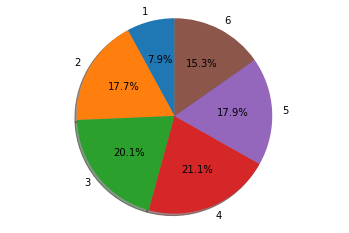

In [14]:
sizes = [np.count_nonzero(citeseer_labels == label) for label in np.unique(citeseer_labels)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=np.unique(citeseer_labels), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

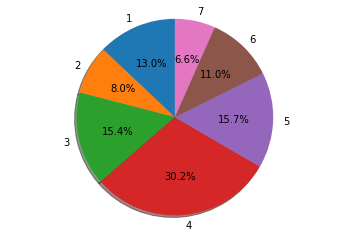

In [12]:
sizes = [np.count_nonzero(cora_labels == label) for label in np.unique(cora_labels)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=np.unique(cora_labels), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

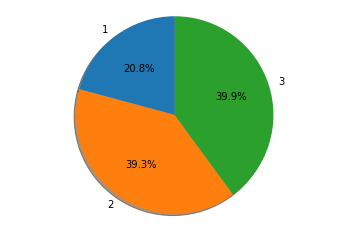

In [13]:
sizes = [np.count_nonzero(pubmed_labels == label) for label in np.unique(pubmed_labels)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=np.unique(pubmed_labels), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## Data Preprocessing

### Balancer les données

In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

In [21]:
smoteImbOver = SMOTE()

citeseer_X_smote, citeseer_labels_smote = smoteImbOver.fit_resample(citeseer_X, citeseer_labels)
citeseer_M_smote, citeseer_labels_Msmote = smoteImbOver.fit_resample(citeseer_M, citeseer_labels)

cora_X_smote, cora_labels_smote = smoteImbOver.fit_resample(cora_X, cora_labels)
cora_M_smote, cora_labels_Msmote = smoteImbOver.fit_resample(cora_M, cora_labels)

pubmed_X_smote, pubmed_labels_smote = smoteImbOver.fit_resample(pubmed_X, pubmed_labels)
pubmed_M_smote, pubmed_labels_Msmote = smoteImbOver.fit_resample(pubmed_M, pubmed_labels)

(citeseer_X_smote.shape ,citeseer_labels_smote.shape), (cora_X_smote.shape ,cora_labels_smote.shape), (pubmed_X_smote.shape ,pubmed_labels_smote.shape)

In [22]:
ccImbUnder = ClusterCentroids(random_state=42)

citeseer_X_cc, citeseer_labels_cc = ccImbUnder.fit_resample(citeseer_X, citeseer_labels)
citeseer_M_cc, citeseer_labels_Mcc = ccImbUnder.fit_resample(citeseer_M, citeseer_labels)

cora_X_cc, cora_labels_cc = ccImbUnder.fit_resample(cora_X, cora_labels)
cora_M_cc, cora_labels_Mcc = ccImbUnder.fit_resample(cora_M, cora_labels)

pubmed_X_cc, pubmed_labels_cc = ccImbUnder.fit_resample(pubmed_X, pubmed_labels)
pubmed_M_cc, pubmed_labels_Mcc = ccImbUnder.fit_resample(pubmed_M, pubmed_labels)

(citeseer_X_cc.shape ,citeseer_labels_cc.shape), (cora_X_cc.shape ,cora_labels_cc.shape), (pubmed_X_cc.shape ,pubmed_labels_cc.shape)

In [23]:
smoteImbCombine = SMOTEENN()

citeseer_X_smoteenn, citeseer_labels_smoteenn = smoteImbCombine.fit_resample(citeseer_X, citeseer_labels)
citeseer_M_smoteenn, citeseer_labels_Msmoteenn = smoteImbCombine.fit_resample(citeseer_M, citeseer_labels)

cora_X_smoteenn, cora_labels_smoteenn = smoteImbCombine.fit_resample(cora_X, cora_labels)
cora_M_smoteenn, cora_labels_Msmoteenn = smoteImbCombine.fit_resample(cora_M, cora_labels)

pubmed_X_smoteenn, pubmed_labels_smoteenn = smoteImbCombine.fit_resample(pubmed_X, pubmed_labels)
pubmed_M_smoteenn, pubmed_labels_Msmoteenn = smoteImbCombine.fit_resample(pubmed_M, pubmed_labels)

(citeseer_X_smoteenn.shape ,citeseer_labels_smoteenn.shape), (cora_X_smoteenn.shape ,cora_labels_smoteenn.shape), (pubmed_X_smoteenn.shape ,pubmed_labels_smoteenn.shape)

## Classification

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, KFold

### CiteSeer

#### Avec la matrice de données X (fea)

In [ ]:
%%capture
X_data, Y_data = citeseer_X, citeseer_labels
X_smote, Y_smote = citeseer_X_smote, citeseer_labels_smote
X_cc, Y_cc = citeseer_X_cc, citeseer_labels_cc
X_smoteenn, Y_smoteenn = citeseer_X_smoteenn, citeseer_labels_smoteenn
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  cv_results_original = cross_val_score(model, X_data, Y_data, cv=kfold, scoring='accuracy')
  cv_results_smote = cross_val_score(model, X_smote, Y_smote, cv=kfold, scoring='accuracy')
  cv_results_cc = cross_val_score(model, X_cc, Y_cc, cv=kfold, scoring='accuracy')
  cv_results_smoteenn = cross_val_score(model, X_smoteenn, Y_smoteenn, cv=kfold, scoring='accuracy')
  method['results']['original'] = {'mean': cv_results_original.mean(), 'max': cv_results_original.max(), 'std': cv_results_original.std()}
  method['results']['smote'] = {'mean': cv_results_smote.mean(), 'max': cv_results_smote.max(), 'std': cv_results_smote.std()}
  method['results']['cc'] = {'mean': cv_results_cc.mean(), 'max': cv_results_cc.max(), 'std': cv_results_cc.std()}
  method['results']['smoteenn'] = {'mean': cv_results_smoteenn.mean(), 'max': cv_results_smoteenn.max(), 'std': cv_results_smoteenn.std()}

In [ ]:
citeseer_X_results = pd.DataFrame.from_dict({(i,j): methods[i]['results'][j] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()},
              orient='index')
citeseer_X_results

#### Avec la matrice $M = D^{-1} W X $

In [ ]:
%%capture
X_data, Y_data = citeseer_X, citeseer_labels
X_smote, Y_smote = citeseer_M_smote, citeseer_labels_Msmote
X_cc, Y_cc = citeseer_M_cc, citeseer_labels_Mcc
X_smoteenn, Y_smoteenn = citeseer_M_smoteenn, citeseer_labels_Msmoteenn
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  cv_results_original = cross_val_score(model, X_data, Y_data, cv=kfold, scoring='accuracy')
  cv_results_smote = cross_val_score(model, X_smote, Y_smote, cv=kfold, scoring='accuracy')
  cv_results_cc = cross_val_score(model, X_cc, Y_cc, cv=kfold, scoring='accuracy')
  cv_results_smoteenn = cross_val_score(model, X_smoteenn, Y_smoteenn, cv=kfold, scoring='accuracy')
  method['results']['original'] = {'mean': cv_results_original.mean(), 'max': cv_results_original.max(), 'std': cv_results_original.std()}
  method['results']['smote'] = {'mean': cv_results_smote.mean(), 'max': cv_results_smote.max(), 'std': cv_results_smote.std()}
  method['results']['cc'] = {'mean': cv_results_cc.mean(), 'max': cv_results_cc.max(), 'std': cv_results_cc.std()}
  method['results']['smoteenn'] = {'mean': cv_results_smoteenn.mean(), 'max': cv_results_smoteenn.max(), 'std': cv_results_smoteenn.std()}

In [ ]:
citeseer_M_results = pd.DataFrame.from_dict({(i,j): methods[i]['results'][j] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()},
              orient='index')
citeseer_M_results

### Cora

#### Avec la matrice de données X (fea)

In [ ]:
%%capture
X_data, Y_data = citeseer_X, citeseer_labels
X_smote, Y_smote = citeseer_X_smote, citeseer_labels_smote
X_cc, Y_cc = citeseer_X_cc, citeseer_labels_cc
X_smoteenn, Y_smoteenn = citeseer_X_smoteenn, citeseer_labels_smoteenn
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  cv_results_original = cross_val_score(model, X_data, Y_data, cv=kfold, scoring='accuracy')
  cv_results_smote = cross_val_score(model, X_smote, Y_smote, cv=kfold, scoring='accuracy')
  cv_results_cc = cross_val_score(model, X_cc, Y_cc, cv=kfold, scoring='accuracy')
  cv_results_smoteenn = cross_val_score(model, X_smoteenn, Y_smoteenn, cv=kfold, scoring='accuracy')
  method['results']['original'] = {'mean': cv_results_original.mean(), 'max': cv_results_original.max(), 'std': cv_results_original.std()}
  method['results']['smote'] = {'mean': cv_results_smote.mean(), 'max': cv_results_smote.max(), 'std': cv_results_smote.std()}
  method['results']['cc'] = {'mean': cv_results_cc.mean(), 'max': cv_results_cc.max(), 'std': cv_results_cc.std()}
  method['results']['smoteenn'] = {'mean': cv_results_smoteenn.mean(), 'max': cv_results_smoteenn.max(), 'std': cv_results_smoteenn.std()}

In [ ]:
citeseer_X_results = pd.DataFrame.from_dict({(i,j): methods[i]['results'][j] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()},
              orient='index')
citeseer_X_results

#### Avec la matrice $M = D^{-1} W X $

In [ ]:
%%capture
X_data, Y_data = citeseer_X, citeseer_labels
X_smote, Y_smote = citeseer_M_smote, citeseer_labels_Msmote
X_cc, Y_cc = citeseer_M_cc, citeseer_labels_Mcc
X_smoteenn, Y_smoteenn = citeseer_M_smoteenn, citeseer_labels_Msmoteenn
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  cv_results_original = cross_val_score(model, X_data, Y_data, cv=kfold, scoring='accuracy')
  cv_results_smote = cross_val_score(model, X_smote, Y_smote, cv=kfold, scoring='accuracy')
  cv_results_cc = cross_val_score(model, X_cc, Y_cc, cv=kfold, scoring='accuracy')
  cv_results_smoteenn = cross_val_score(model, X_smoteenn, Y_smoteenn, cv=kfold, scoring='accuracy')
  method['results']['original'] = {'mean': cv_results_original.mean(), 'max': cv_results_original.max(), 'std': cv_results_original.std()}
  method['results']['smote'] = {'mean': cv_results_smote.mean(), 'max': cv_results_smote.max(), 'std': cv_results_smote.std()}
  method['results']['cc'] = {'mean': cv_results_cc.mean(), 'max': cv_results_cc.max(), 'std': cv_results_cc.std()}
  method['results']['smoteenn'] = {'mean': cv_results_smoteenn.mean(), 'max': cv_results_smoteenn.max(), 'std': cv_results_smoteenn.std()}

In [ ]:
citeseer_M_results = pd.DataFrame.from_dict({(i,j): methods[i]['results'][j] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()},
              orient='index')
citeseer_M_results

### Pubmed

#### Avec la matrice de données X (fea)

In [ ]:
%%capture
X_data, Y_data = citeseer_X, citeseer_labels
X_smote, Y_smote = citeseer_X_smote, citeseer_labels_smote
X_cc, Y_cc = citeseer_X_cc, citeseer_labels_cc
X_smoteenn, Y_smoteenn = citeseer_X_smoteenn, citeseer_labels_smoteenn
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  cv_results_original = cross_val_score(model, X_data, Y_data, cv=kfold, scoring='accuracy')
  cv_results_smote = cross_val_score(model, X_smote, Y_smote, cv=kfold, scoring='accuracy')
  cv_results_cc = cross_val_score(model, X_cc, Y_cc, cv=kfold, scoring='accuracy')
  cv_results_smoteenn = cross_val_score(model, X_smoteenn, Y_smoteenn, cv=kfold, scoring='accuracy')
  method['results']['original'] = {'mean': cv_results_original.mean(), 'max': cv_results_original.max(), 'std': cv_results_original.std()}
  method['results']['smote'] = {'mean': cv_results_smote.mean(), 'max': cv_results_smote.max(), 'std': cv_results_smote.std()}
  method['results']['cc'] = {'mean': cv_results_cc.mean(), 'max': cv_results_cc.max(), 'std': cv_results_cc.std()}
  method['results']['smoteenn'] = {'mean': cv_results_smoteenn.mean(), 'max': cv_results_smoteenn.max(), 'std': cv_results_smoteenn.std()}

In [ ]:
citeseer_X_results = pd.DataFrame.from_dict({(i,j): methods[i]['results'][j] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()},
              orient='index')
citeseer_X_results

#### Avec la matrice $M = D^{-1} W X $

In [ ]:
%%capture
X_data, Y_data = citeseer_X, citeseer_labels
X_smote, Y_smote = citeseer_M_smote, citeseer_labels_Msmote
X_cc, Y_cc = citeseer_M_cc, citeseer_labels_Mcc
X_smoteenn, Y_smoteenn = citeseer_M_smoteenn, citeseer_labels_Msmoteenn
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)
  cv_results_original = cross_val_score(model, X_data, Y_data, cv=kfold, scoring='accuracy')
  cv_results_smote = cross_val_score(model, X_smote, Y_smote, cv=kfold, scoring='accuracy')
  cv_results_cc = cross_val_score(model, X_cc, Y_cc, cv=kfold, scoring='accuracy')
  cv_results_smoteenn = cross_val_score(model, X_smoteenn, Y_smoteenn, cv=kfold, scoring='accuracy')
  method['results']['original'] = {'mean': cv_results_original.mean(), 'max': cv_results_original.max(), 'std': cv_results_original.std()}
  method['results']['smote'] = {'mean': cv_results_smote.mean(), 'max': cv_results_smote.max(), 'std': cv_results_smote.std()}
  method['results']['cc'] = {'mean': cv_results_cc.mean(), 'max': cv_results_cc.max(), 'std': cv_results_cc.std()}
  method['results']['smoteenn'] = {'mean': cv_results_smoteenn.mean(), 'max': cv_results_smoteenn.max(), 'std': cv_results_smoteenn.std()}

In [ ]:
citeseer_M_results = pd.DataFrame.from_dict({(i,j): methods[i]['results'][j] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()},
              orient='index')
citeseer_M_results